## This is Zach's Jupyter Notebook. If it changes unbeknownst to him, the sky will rain fire.

In [253]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# read csv using pandas
df = pd.read_csv("./data/Warehouse_and_Retail_Sales.csv")

## Converting columns to NumPy arrays

In [254]:
# filter rows by year & month, adding columns to get monthly total
# monthly = df.groupby(["YEAR", "MONTH"]).sum()


labelsNumpy=np.array(df.columns)
numpyDf = df.to_numpy()
display(labelsNumpy)
monthlyDates=np.arange('2017-04','2018-03', dtype='datetime64[M]')
display(monthlyDates)
# #build real date column from year and month ex: 2017 + 4 -> "2017-04"
# dates=pd.to_datetime(monthly.index.get_level_values(0).astype(str)+"-"+monthly.index.get_level_values(1).astype(str)+"-01")



# warehouseSales=monthly["WAREHOUSE SALES"].values # is numpy array of warehouse sales
# retailSales=monthly["RETAIL SALES"].values # numpy array of retail sales

array(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype=object)

array(['2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02'],
      dtype='datetime64[M]')

## Create a 2x2 subplot grid

Text(0.5, 0.98, 'My Dashboard to Rename')

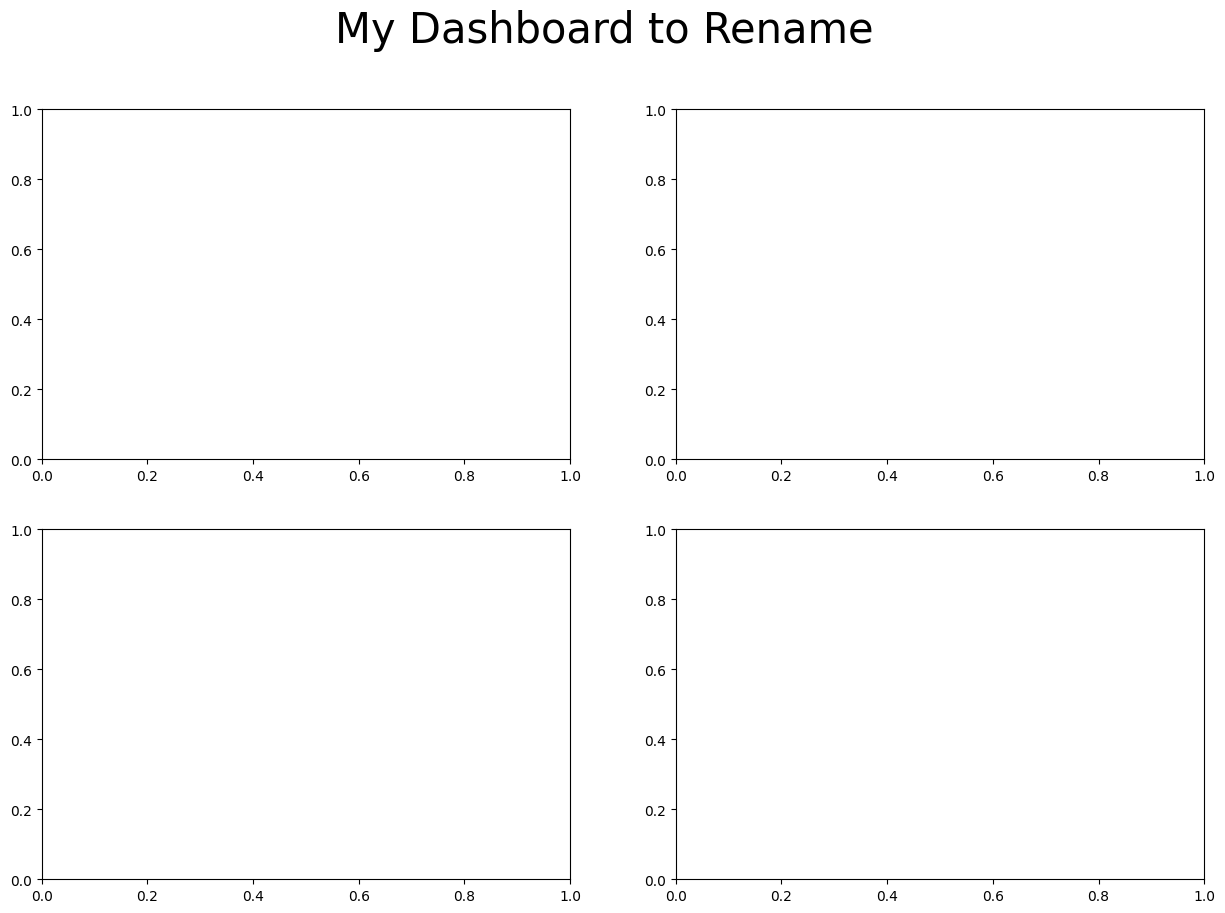

In [255]:
#creates a figure with 4 plots on a 2x2 grid
#shows a blueprint for axes becoming a 2d array 
# like axes[0,0], axes[0,1], axes[1,0], axes[1,1]
fig, axes = plt.subplots(2,2,figsize=(15,10))
#Title for entire dashboard
fig.suptitle("My Dashboard to Rename",fontsize=30)

## Taking everything and attempting to use NumPy to hangle the data

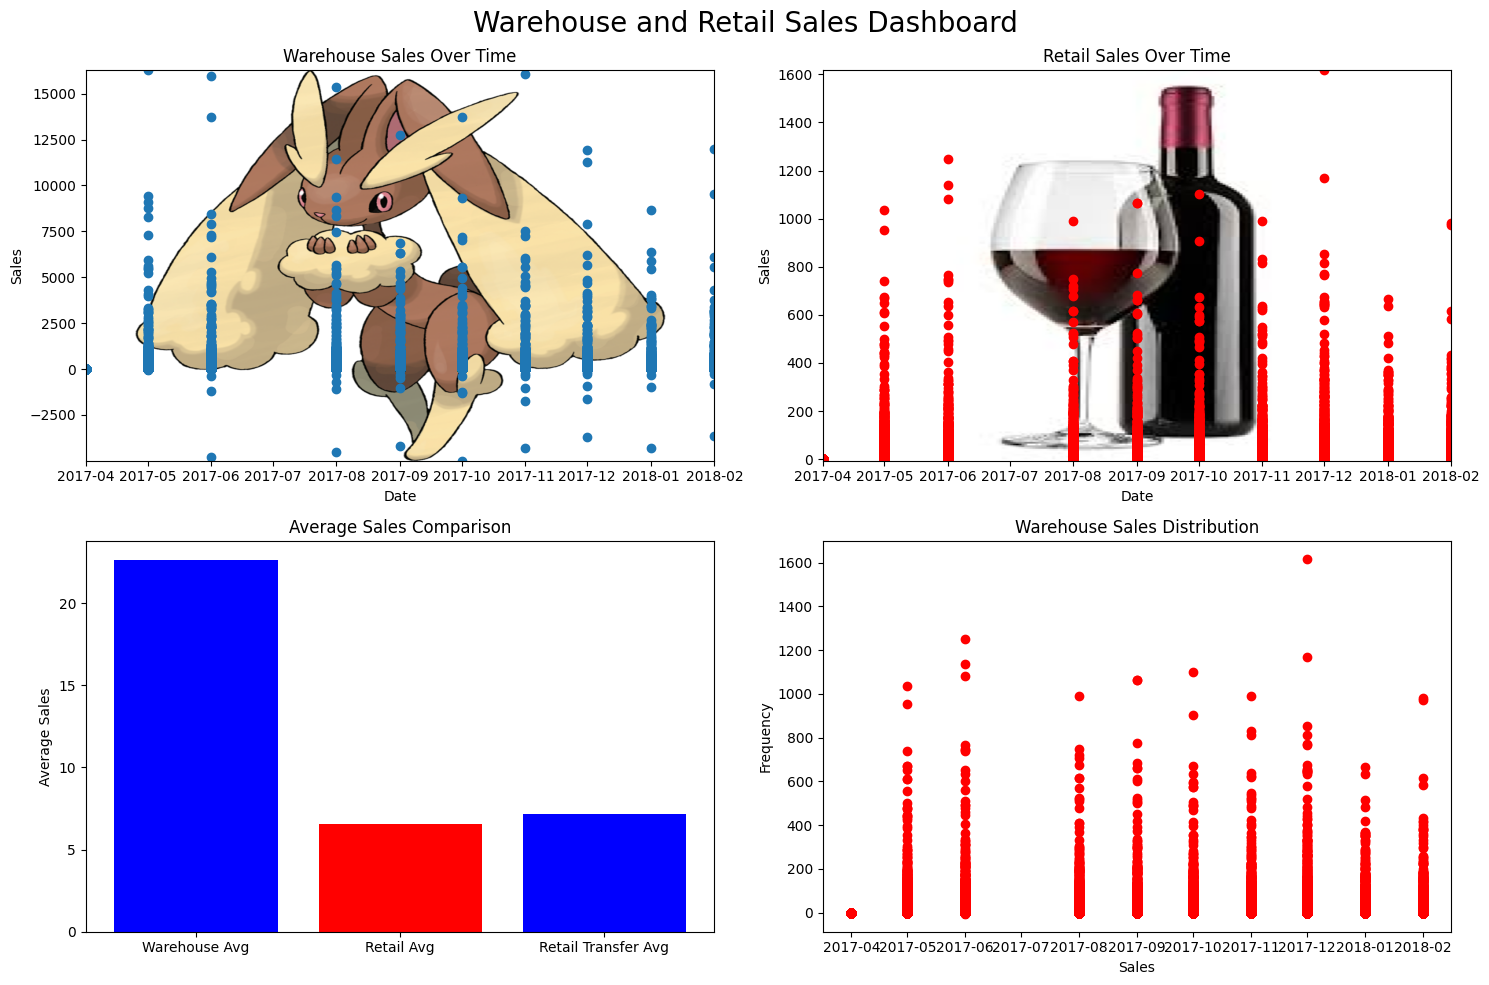

In [256]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# read csv using pandas
df = pd.read_csv("./data/Warehouse_and_Retail_Sales.csv")

#This turns all the column labels into a numpy array for index reference
labelsNumpy=np.array(df.columns)
numpyDf = df.to_numpy()
# display(labelsNumpy)

#This is supposed to create dates to help display the data later
#.astype(str) ensures the year and month are cast as string
# .str.zfill(2) front fills each integer with 0s to a max of 2 decimal places
# ex: '01','02','03'
monthStrings=df['YEAR'].astype(str)+'-'+df['MONTH'].astype(str).str.zfill(2)
monthDates=monthStrings.to_numpy(dtype='datetime64[M]')
flattened_month_dates=np.array(monthDates).flatten()

# monthlyDates=np.arange('2017-04','2018-03', dtype='datetime64[M]')
# display(monthlyDates)

#This gets warehouse sales and retail sales into np arrays
#The reshape takes the first two dimensions and multiplies them to add them together
#I know the dimesnions are 128k,1,1 based on an error so the -1 combines the first 2 and 
# the 1 is to keep the last dimension.
warehouse_sales_index=numpyDf[:,np.where(labelsNumpy=='WAREHOUSE SALES')]
warehouse_sales=np.array(warehouse_sales_index).reshape(-1,1)
flattened_warehouse_sales=np.array(warehouse_sales).flatten()


retail_sales_index=numpyDf[:,np.where(labelsNumpy=='RETAIL SALES')]
retail_sales=np.array(retail_sales_index).reshape(-1,1)
flattened_retail_sales=np.array(retail_sales).flatten()

retail_transfers=np.array(numpyDf[:,np.where(labelsNumpy=='RETAIL TRANSFERS')]).reshape(-1,1)
flattened_retail_transfers=np.array(retail_transfers).flatten()
#at first did this but this only accesses the row at the index
#avg_warehouse=np.mean(numpyDf[np.where(labelsNumpy=='WAREHOUSE SALES')])

# gets the index of Warehouse Sales
#np.where(labelsNumpy=='WAREHOUSE SALES')

#this accesses all rows at the column of the index
# avg_warehouse=np.mean(numpyDf[:, np.where(labelsNumpy=='WAREHOUSE SALES')])
# display(avg_warehouse)

image1=plt.imread("./data/800px-0428Lopunny.png")
image2=plt.imread("./data/wine.jpeg")
# image2
# image3
# image4

######################################################

fig, axes = plt.subplots(2,2,figsize=(15,10))
# biiig title for entire dashboard
fig.suptitle("Warehouse and Retail Sales Dashboard", fontsize=20)

######################################################

# # drawing line chart of date vs warehouse sales

#You need to find the min and the max of the arrays to find the edges of
#the extent to display the photo properly in the background
#otherwise it can squish or misalign the image.
x_min = flattened_month_dates.min()
x_max = flattened_month_dates.max()
y_min = flattened_warehouse_sales.min()
y_max = flattened_warehouse_sales.max()

#This is the line that puts the image behind the data
#axes[0,0].imshow(imData, extent=[0, 1, 0, 1], aspect='auto', zorder=0)
axes[0,0].imshow(image1, extent=[x_min, x_max, y_min, y_max], aspect='auto', zorder=0)


#Initally tried this but discovered seaborn requires 1darrays 
# so I had to flatter each of the arrays used
# sns.scatterplot(x=monthDates,y=warehouse_sales, ax=axes[0,0])

# sns.scatterplot(x=flattened_month_dates,y=flattened_warehouse_sales, ax=axes[0,0])
#### i found out you don't neeeeeed seaborn because the line above is the correct
#### way to input your image as the background
axes[0,0].scatter(flattened_month_dates, flattened_warehouse_sales)
# giving plot 1 title
axes[0,0].set_title("Warehouse Sales Over Time")
# labeling x and y axes
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Sales")

######################################################

# retail sales over time
x_min = flattened_month_dates.min()
x_max = flattened_month_dates.max()
y_min = flattened_retail_sales.min()
y_max = flattened_retail_sales.max()
axes[0,1].imshow(image2, extent=[x_min, x_max, y_min, y_max], aspect='auto', zorder=0)

# drawing a red line of date vs sales
axes[0,1].scatter(flattened_month_dates,flattened_retail_sales,color="red")
# giving plot 2 title
axes[0,1].set_title("Retail Sales Over Time")
# labeling x and y axes
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Sales")

######################################################

# around 40~% of retail sales are in warehouse sales
# shows avg sales comparison

# calculate averages using numpy fast & efficiently >:)
avg_warehouse = np.mean(warehouse_sales)
avg_retail = np.mean(retail_sales)
avg_retail_transfers=np.mean(retail_transfers)
# creates bar chart comparing averages which shows warehouse avg and retail avg
axes[1,0].bar(["Warehouse Avg", "Retail Avg", "Retail Transfer Avg"], [avg_warehouse, avg_retail, avg_retail_transfers], color=["blue","red"])
# labeling axes and title
axes[1,0].set_title("Average Sales Comparison")
axes[1,0].set_ylabel("Average Sales")

######################################################

axes[1,1].scatter(monthDates,retail_sales,color="red")

axes[1,1].set_title("Warehouse Sales Distribution")
axes[1,1].set_xlabel("Sales")
axes[1,1].set_ylabel("Frequency")

#------------------------------------------------------------

# clean up layout and let there be light...
plt.tight_layout(rect=[0,0,1,1])
# plt.imshow(imData,extent=[0,1,0,1],aspect='auto')
# background_plt=plt.axes([0,0,1,1])
# background_plt.set_zorder(-1)
# background_plt.imshow(imData,aspect='auto')
plt.show()